以下のコードでメトロポリス法によるスピン配位を生成できる

In [ ]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In [11]:
# 関数を定義
def metropolis_ising(L, T, num_steps, J=1):
    lattice = np.random.choice([-1, 1], size=(L, L))
    energies = []
    
    for step in range(num_steps):
        i = np.random.randint(L)
        j = np.random.randint(L)
        
        
        # 近傍のスピンの総和を計算（周期境界条件を適用）
        total = lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] + \
                lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
        
        # エネルギー差を計算
        delta_energy = 2 * J * lattice[i, j] * total
        
        if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / T):
            # スピンを反転させる
            lattice[i, j] *= -1
            
        energies.append(-J * np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, 1, axis=1))))
        
    # スピン変数全体を反転させる
    if np.sum(lattice==1) >= L*L/2:
        lattice = lattice*-1
    else:
        lattice = lattice

    return lattice, energies


黒(-1)の割合は 0.6865234375


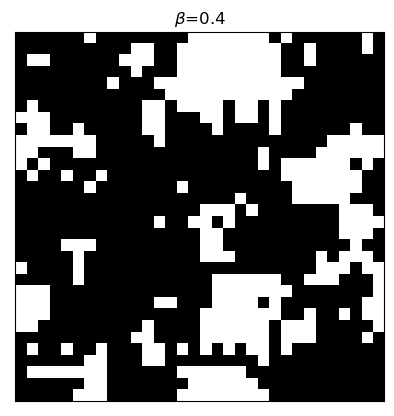

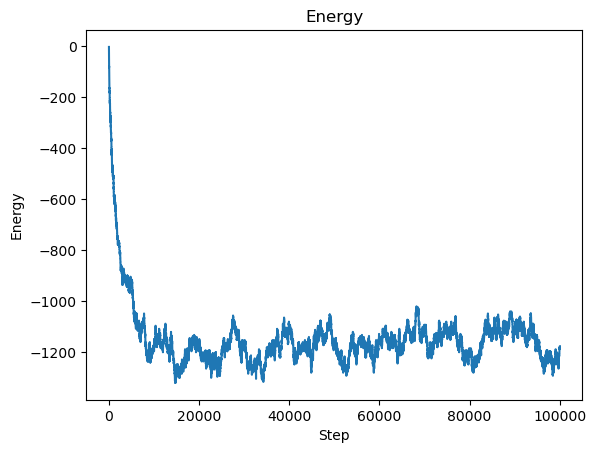

In [12]:
# 1個の配位
beta = 0.4
L = 32
T = 1/beta
num_steps = 100000
lattice, energies = metropolis_ising(L, T, num_steps)

# 黒の割合を出力
print("黒(-1)の割合は",np.sum(lattice==-1)/lattice.size)

# スピン配位の可視化
plt.imshow(lattice, cmap='gray', interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.title(r"$\beta$" f"={beta}")
# 図をファイルとして保存
plt.savefig(f'../image storage/spin_conf_L{L}_beta{beta}.png')
plt.show()

# エネルギーの変化の可視化
plt.plot(energies)
plt.title("Energy")
plt.xlabel("Step")
plt.ylabel("Energy")

plt.show()


黒(-1)の割合（beta=0.2）は 0.5107421875
黒(-1)の割合（beta=0.4）は 0.5654296875
黒(-1)の割合（beta=0.5）は 0.9287109375
黒(-1)の割合（beta=0.7）は 0.75390625


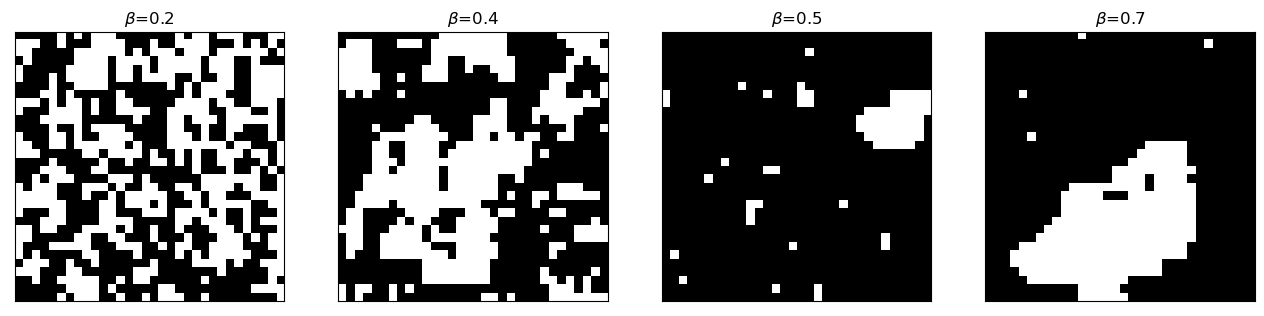

In [16]:
L = 32
num_steps = 100000
# 4つの逆温度
betas = [0.2, 0.4, 0.5, 0.7]

# 4つのサンプルとエネルギーを保存するリスト
samples = []
energies_list = []

# 4つの逆温度でサンプルを取得
for beta in betas:
    T = 1/beta
    lattice, energies = metropolis_ising(L, T, num_steps)
    samples.append(lattice)
    energies_list.append(energies)

# スピン配位の可視化
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# fig.suptitle("Metropolis Sampling at Different Temperatures")

for i in range(4):
    # 黒の割合を出力
    print(f"黒(-1)の割合（beta={betas[i]}）は", np.sum(samples[i] == -1) / samples[i].size)

    # スピン配位の可視化
    axes[i].imshow(samples[i], cmap='gray', interpolation='nearest')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title(r"$\beta$" f"={betas[i]}")

# 図をファイルとして保存
plt.savefig('../image storage/spin_conf_0.2-0.7.png')
plt.show()

# エネルギーの変化の可視化
# fig, axes = plt.subplots(1, 4, figsize=(16, 4))
# fig.suptitle("Energy at Different Temperatures")

# for i in range(4):
#     axes[i].plot(energies_list[i])
#     axes[i].set_title(r"$\beta$" f"={betas[i]}")
#     axes[i].set_xlabel("Step")
#     axes[i].set_ylabel("Energy")

# plt.show()

In [10]:
print(lattice)

[[ 1  1 -1 -1 -1  1 -1 -1 -1  1]
 [-1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1 -1  1  1 -1]
 [ 1 -1 -1 -1  1  1 -1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1  1 -1  1]
 [ 1  1  1  1 -1 -1 -1 -1 -1  1]
 [-1  1 -1 -1  1 -1 -1 -1  1  1]
 [-1  1 -1 -1 -1  1 -1  1  1 -1]
 [ 1  1 -1  1  1 -1 -1  1  1 -1]
 [ 1  1 -1  1  1  1 -1  1  1 -1]]


In [3]:
print(np.ndarray.flatten(lattice))

[-1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1
  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1
  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1  1  1  1 -1
 -1 -1  1 -1]


In [5]:
import numpy as np

# 1から100までの整数を生成
numbers = np.arange(1, 101)

# 10x10の配列に変形
array_10x10 = numbers.reshape(10, 10)

print(array_10x10)


[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


T=1からT=6まで，0.25刻みで配位データを取得

In [14]:
# 格子サイズを10，マルコフモンテルロ法のステップ数を100*L^2=10000に設定
L = 10 
num_steps = 100*L^2

# とりあえず101列の配列を作成
spin_data = np.arange(100)
temp_data = []

# 一次元データを得る
for T in tqdm(np.arange(0.0, 6.01, 0.25)):
    # T=0はmetropolis_isingには定義されていないのでT=0.01をT=0のデータとする
    if T==0.0:
        T = 0.01     
    # 各温度で1000個ずつ配位を作成   
    for i in tqdm(range(10)):
        lattice, energies = metropolis_ising(L, T, num_steps)
        # lattoceをspindataに追加
        dataset = np.vstack((dataset, data))
    
# とりあえずで作成した1列目を削除
dataset = np.delete(dataset, 0, axis=0)


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]


NameError: name 'dataset' is not defined

In [11]:
print(lattice[0])

[ 1  1 -1 -1 -1  1 -1 -1 -1  1]


In [6]:
# データサイズの確認
print(np.shape(dataset))

(250, 101)


In [9]:
print(dataset[10])

[-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.    1.    1.    1.
  1.    1.   -1.   -1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.   -1.   -1.   -1.   -1.
  1.    1.    1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.
 -1.   -1.   -1.   -1.    0.25]


In [ ]:
# Numpy配列をPandasのデータフレームに変換
df = pd.DataFrame(dataset)

# CSVファイルを101列目だけ小数第2位で表示するため
fmt_list = ['%d']*100 + ['%.2f']

# csvファイルで保存
df.to_csv('dataframe.csv', index=False)

In [ ]:
df.shape

(25000, 101)

In [11]:
import numpy as np

# 10x10の配列を作成
array1 = np.arange(1, 101).reshape(10, 10)
array2 = np.arange(101, 201).reshape(10, 10)

print(array1)
print(array2)




[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]
[[101 102 103 104 105 106 107 108 109 110]
 [111 112 113 114 115 116 117 118 119 120]
 [121 122 123 124 125 126 127 128 129 130]
 [131 132 133 134 135 136 137 138 139 140]
 [141 142 143 144 145 146 147 148 149 150]
 [151 152 153 154 155 156 157 158 159 160]
 [161 162 163 164 165 166 167 168 169 170]
 [171 172 173 174 175 176 177 178 179 180]
 [181 182 183 184 185 186 187 188 189 190]
 [191 192 193 194 195 196 197 198 199 200]]


In [12]:
# np.vstack()を使用して下に結合
stacked_array = np.vstack((array1, array2))

print(stacked_array)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]
 [101 102 103 104 105 106 107 108 109 110]
 [111 112 113 114 115 116 117 118 119 120]
 [121 122 123 124 125 126 127 128 129 130]
 [131 132 133 134 135 136 137 138 139 140]
 [141 142 143 144 145 146 147 148 149 150]
 [151 152 153 154 155 156 157 158 159 160]
 [161 162 163 164 165 166 167 168 169 170]
 [171 172 173 174 175 176 177 178 179 180]
 [181 182 183 184 185 186 187 188 189 190]
 [191 192 193 194 195 196 197 198 199 200]]
